In [1]:
# Import and GPU Support
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time

from B_data import create_residual_data, create_IC_data, initial_u,exact_u, create_BC_data, create_RH_data,create_RH_data_endt,Move_Time_1D
from B_Plotting import Burgers_plot, loss_plot 

# Full PINN
from B_PINN import NN
from B_PINN_train import pinn_train

# Burgers GPT-PINN
from B_GPT_activation import P
from B_GPT_PINN import GPT
from B_GPT_train import gpt_train

torch.set_default_dtype(torch.float)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current Device: {device}")
if torch.cuda.is_available():
    print(f"Current Device Name: {torch.cuda.get_device_name()}")

Current Device: cuda
Current Device Name: NVIDIA A100-SXM4-40GB


In [2]:
# Training Parameter Set
number_of_parameters = 1
nu_training = np.linspace(1,2,number_of_parameters)
nu_pinn_train = 1.0
number_of_neurons = 1
P_list = np.ones(number_of_neurons, dtype=object)

In [3]:
# Domain and Data
Xi, Xf         = -1.0, 1.0
Ti, Tf         =  0.0, 1.0
Nx_train, Nt_train =  101, 201
Nx_test, Nt_test = 101, 201
IC_pts, IC_simple = 100, 100
BC_pts =  100
N_RH = IC_pts
dx = 0.001
dt = 0.002

residual_data = create_residual_data(Xi, Xf, Ti, Tf, Nx_train, Nt_train, Nx_test, Nt_test, dx,dt)
xt_resid      = residual_data[0].to(device)
f_hat         = residual_data[1].to(device)
xt_test       = residual_data[2].to(device)
xt_RHL      = residual_data[3].to(device)
xt_RHR      = residual_data[4].to(device)
xt_RHt         = residual_data[5].to(device)
xt_RHtL       = residual_data[6].to(device)


BC_data = create_BC_data(Xi, Xf, Ti, Tf, BC_pts)
BC1     = BC_data[0].to(device)
BC2     = BC_data[1].to(device)

#xt_RH_data = create_RH_data(Xi, Xf, Ti, Tf, IC_pts, N_RH,dx)
#xt_RH = xt_RH_data[0].to(device)
#xt_RHL = xt_RH_data[1].to(device)

IC_data = create_IC_data(nu_pinn_train,Xi, Xf, Ti, Tf, IC_pts, IC_simple)
IC_xt     = IC_data[0].to(device)
IC_u      = IC_data[1].to(device)

xt_en = Move_Time_1D(IC_xt, Tf).to(device)

In [4]:
# Setting PINN and TGPT-PINN
#layers_pinn = np.array([2, 30, 30, 30, 30, 30, 1])
layers_pinn = np.array([2, 20,20,20,20, 1])

lr_pinn     = 0.001
epochs_pinn = 25000
tol_pinn    = 1e-6

pinn_train_times = np.ones(number_of_neurons)

###############################################################################
################################ Training Loop ################################
###############################################################################

******************************************************************
Epoch: 200 | loss: 0.22343938052654266,rMAE: 0.20832312107086182, rRMSE:0.2984524667263031,loss_RH:0.00000000,loss_con:0.97162110,loss_R:0.015494103543460369,loss_IC:0.019861526787281036,loss_BC:0.0009330001194030046
Epoch: 400 | loss: 0.1046782061457634,rMAE: 0.15066587924957275, rRMSE:0.2914200723171234,loss_RH:0.00000000,loss_con:1.00424695,loss_R:0.005052576307207346,loss_IC:0.009703997522592545,loss_BC:0.00025856588035821915
Epoch: 600 | loss: 0.0709749311208725,rMAE: 0.1259307563304901, rRMSE:0.2700766324996948,loss_RH:0.00000000,loss_con:1.01049185,loss_R:0.0024809888564050198,loss_IC:0.006707100663334131,loss_BC:0.00014229307998903096
Epoch: 800 | loss: 0.04894120991230011,rMAE: 0.10523345321416855, rRMSE:0.25860708951950073,loss_RH:0.00000000,loss_con:1.02434754,loss_R:0.0012417733669281006,loss_IC:0.004626334644854069,loss_BC:0.00014360879140440375
Epoch: 1000 | loss: 0.03357500955462456,rMAE: 0.10579732805490

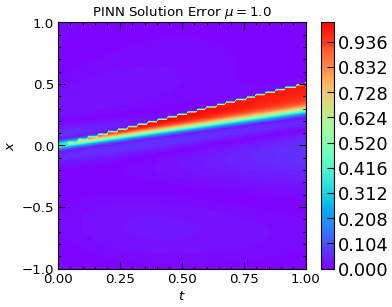

Epoch: 1200 | loss: 0.02474217861890793,rMAE: 0.10929033160209656, rRMSE:0.2755107879638672,loss_RH:0.00000000,loss_con:0.99756950,loss_R:0.0007046128739602864,loss_IC:0.0023702355101704597,loss_BC:3.352115527377464e-05
Epoch: 1400 | loss: 0.018597260117530823,rMAE: 0.11307784169912338, rRMSE:0.2861742079257965,loss_RH:0.00000000,loss_con:0.99762499,loss_R:0.0005909630563110113,loss_IC:0.0017756314482539892,loss_BC:2.4998176741064526e-05
Epoch: 1600 | loss: 0.013812318444252014,rMAE: 0.11672476679086685, rRMSE:0.2953088581562042,loss_RH:0.00000000,loss_con:0.99870890,loss_R:0.0005124807357788086,loss_IC:0.001310235122218728,loss_BC:1.9748717022594064e-05
Epoch: 1800 | loss: 0.009993617422878742,rMAE: 0.11954759806394577, rRMSE:0.30232223868370056,loss_RH:0.00000000,loss_con:0.99973440,loss_R:0.00046065979404374957,loss_IC:0.0009362826822325587,loss_BC:1.7013036995194852e-05
Epoch: 2000 | loss: 0.006982209626585245,rMAE: 0.12143201380968094, rRMSE:0.3076893389225006,loss_RH:0.00000000,l

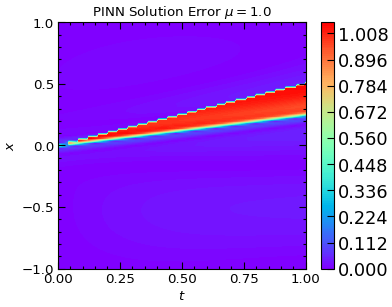

Epoch: 2200 | loss: 0.004753266926854849,rMAE: 0.12204377353191376, rRMSE:0.31124189496040344,loss_RH:0.00000000,loss_con:0.99763435,loss_R:0.0003874218964483589,loss_IC:0.0004223443102091551,loss_BC:1.4240209566196427e-05
Epoch: 2400 | loss: 0.0032032316084951162,rMAE: 0.12175769358873367, rRMSE:0.3130902647972107,loss_RH:0.00000000,loss_con:1.00045991,loss_R:0.00036388993612490594,loss_IC:0.0002719492476899177,loss_BC:1.1984914635831956e-05
Epoch: 2600 | loss: 0.0022310088388621807,rMAE: 0.12035804986953735, rRMSE:0.31345126032829285,loss_RH:0.00000000,loss_con:1.00036907,loss_R:0.0003292289620731026,loss_IC:0.00017961396952159703,loss_BC:1.0564019248704426e-05
Epoch: 2800 | loss: 0.001924032112583518,rMAE: 0.117670439183712, rRMSE:0.31264960765838623,loss_RH:0.00000000,loss_con:1.01302159,loss_R:0.0003264827828388661,loss_IC:0.00012953917030245066,loss_BC:3.0215756851248443e-05
Epoch: 3000 | loss: 0.0012637681793421507,rMAE: 0.11644463241100311, rRMSE:0.31209999322891235,loss_RH:0.0

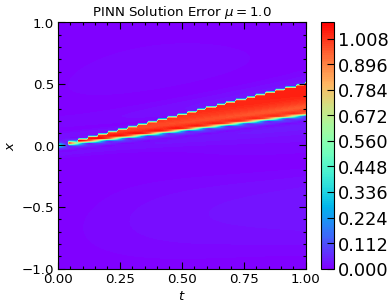

Epoch: 3200 | loss: 0.0010253210784867406,rMAE: 0.11424238234758377, rRMSE:0.3107668161392212,loss_RH:0.00000000,loss_con:0.99959439,loss_R:0.00022625979909207672,loss_IC:7.260217535076663e-05,loss_BC:7.303951861103997e-06
Epoch: 3400 | loss: 0.0008614074322395027,rMAE: 0.11216417700052261, rRMSE:0.3094059228897095,loss_RH:0.00000000,loss_con:1.00044918,loss_R:0.00020036951173096895,loss_IC:5.972357394057326e-05,loss_BC:6.380221293511568e-06
Epoch: 3600 | loss: 0.0007384538184851408,rMAE: 0.11042790859937668, rRMSE:0.30818331241607666,loss_RH:0.00000000,loss_con:0.99937785,loss_R:0.00017567897157277912,loss_IC:5.064360084361397e-05,loss_BC:5.633879482047632e-06
Epoch: 3800 | loss: 0.0006436832481995225,rMAE: 0.10871783643960953, rRMSE:0.30690059065818787,loss_RH:0.00000000,loss_con:0.99933767,loss_R:0.0001557935611344874,loss_IC:4.3897096475120634e-05,loss_BC:4.891872777079698e-06
Epoch: 4000 | loss: 0.0007222131243906915,rMAE: 0.10765976458787918, rRMSE:0.3060218393802643,loss_RH:0.00

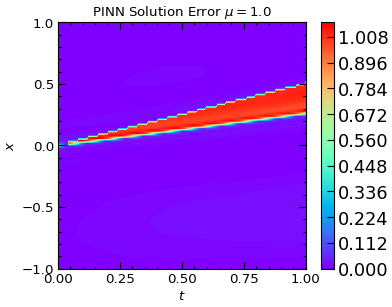

Epoch: 4200 | loss: 0.0005017108051106334,rMAE: 0.1058201864361763, rRMSE:0.3046374022960663,loss_RH:0.00000000,loss_con:0.99924874,loss_R:0.0001253136870218441,loss_IC:3.397328327992e-05,loss_BC:3.6664273466158193e-06
Epoch: 4400 | loss: 0.00044521133531816304,rMAE: 0.10439854860305786, rRMSE:0.3034301996231079,loss_RH:0.00000000,loss_con:0.99930823,loss_R:0.00011285329674137756,loss_IC:3.010410364367999e-05,loss_BC:3.1316983495344175e-06
Epoch: 4600 | loss: 0.0003997452149633318,rMAE: 0.1029151901602745, rRMSE:0.3021080493927002,loss_RH:0.00000000,loss_con:0.99751985,loss_R:9.958311420632526e-05,loss_IC:2.6619249183568172e-05,loss_BC:3.3969615742535098e-06
Epoch: 4800 | loss: 0.0003520638565532863,rMAE: 0.1015695333480835, rRMSE:0.30067354440689087,loss_RH:0.00000000,loss_con:0.99935615,loss_R:9.176848834613338e-05,loss_IC:2.374999166931957e-05,loss_BC:2.279546151839895e-06
Epoch: 5000 | loss: 0.0003745553258340806,rMAE: 0.10005700588226318, rRMSE:0.29904264211654663,loss_RH:0.000000

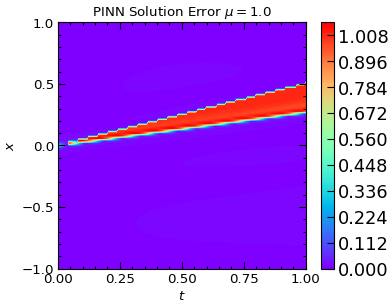

Epoch: 5200 | loss: 0.00027810741448774934,rMAE: 0.09877168387174606, rRMSE:0.2975910007953644,loss_RH:0.00000000,loss_con:0.99944884,loss_R:7.553370960522443e-05,loss_IC:1.863065335783176e-05,loss_BC:1.6267174487438751e-06
Epoch: 5400 | loss: 0.00024632515851408243,rMAE: 0.0973408967256546, rRMSE:0.29594874382019043,loss_RH:0.00000000,loss_con:0.99950069,loss_R:6.834043597336859e-05,loss_IC:1.6442927517346106e-05,loss_BC:1.355546146442066e-06
Epoch: 5600 | loss: 0.0008141465368680656,rMAE: 0.09937316179275513, rRMSE:0.2952113747596741,loss_RH:0.00000000,loss_con:0.98121512,loss_R:6.707959255436435e-05,loss_IC:2.8420665330486372e-05,loss_BC:4.6286026190500706e-05
Epoch: 5800 | loss: 0.00019413446716498584,rMAE: 0.0946471095085144, rRMSE:0.29266947507858276,loss_RH:0.00000000,loss_con:0.99960881,loss_R:5.725874871131964e-05,loss_IC:1.2758522643707693e-05,loss_BC:9.290487241742085e-07
Epoch: 6000 | loss: 0.00017602770822122693,rMAE: 0.09314043819904327, rRMSE:0.2906654179096222,loss_RH:0

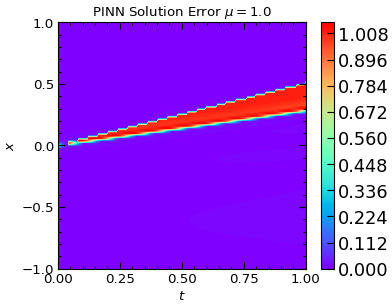

Epoch: 6200 | loss: 0.00015287796850316226,rMAE: 0.09136909246444702, rRMSE:0.28824251890182495,loss_RH:0.00000000,loss_con:0.99970472,loss_R:4.828239980270155e-05,loss_IC:9.83228164841421e-06,loss_BC:6.272745167734683e-07
Epoch: 6400 | loss: 0.00013543009117711335,rMAE: 0.08925849944353104, rRMSE:0.28519630432128906,loss_RH:0.00000000,loss_con:0.99950165,loss_R:4.4010339479427785e-05,loss_IC:8.600086403021123e-06,loss_BC:5.418889941211091e-07
Epoch: 6600 | loss: 0.00012035654799547046,rMAE: 0.0872022733092308, rRMSE:0.2820931077003479,loss_RH:0.00000000,loss_con:0.99992812,loss_R:4.0733066271059215e-05,loss_IC:7.550488135166233e-06,loss_BC:4.118598724289768e-07
Epoch: 6800 | loss: 0.00010718056000769138,rMAE: 0.0851883590221405, rRMSE:0.27903932332992554,loss_RH:0.00000000,loss_con:0.99984956,loss_R:3.763724089367315e-05,loss_IC:6.614890935452422e-06,loss_BC:3.394412431134697e-07
Epoch: 7000 | loss: 0.0012288264697417617,rMAE: 0.09351539611816406, rRMSE:0.2748658359050751,loss_RH:0.00

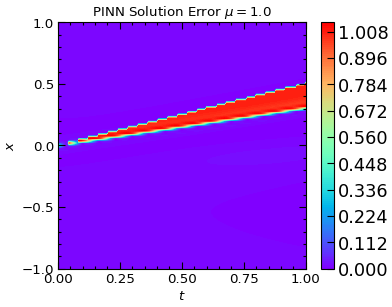

Epoch: 7200 | loss: 8.580648864153773e-05,rMAE: 0.08047312498092651, rRMSE:0.27144452929496765,loss_RH:0.00000000,loss_con:0.99992001,loss_R:3.246442065574229e-05,loss_IC:5.104979209136218e-06,loss_BC:2.292276235493773e-07
Epoch: 7400 | loss: 7.700216519879177e-05,rMAE: 0.0778077095746994, rRMSE:0.2668885290622711,loss_RH:0.00000000,loss_con:0.99969864,loss_R:2.9967259251861833e-05,loss_IC:4.503510808717692e-06,loss_BC:1.9997958133899374e-07
Epoch: 7600 | loss: 6.979170575505123e-05,rMAE: 0.07522277534008026, rRMSE:0.2624516487121582,loss_RH:0.00000000,loss_con:0.99997556,loss_R:2.8314350856817327e-05,loss_IC:3.984973773185629e-06,loss_BC:1.6276189285235887e-07
Epoch: 7800 | loss: 6.335030775517225e-05,rMAE: 0.07239359617233276, rRMSE:0.25734513998031616,loss_RH:0.00000000,loss_con:1.00001168,loss_R:2.652438524819445e-05,loss_IC:3.5472248782753013e-06,loss_BC:1.3536750032017153e-07
Epoch: 8000 | loss: 5.7694855058798566e-05,rMAE: 0.06918350607156754, rRMSE:0.251443088054657,loss_RH:0.0

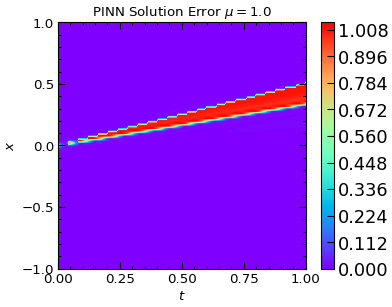

Epoch: 8200 | loss: 0.00017790327547118068,rMAE: 0.06687578558921814, rRMSE:0.24588780105113983,loss_RH:0.00000000,loss_con:0.99177200,loss_R:2.660329482750967e-05,loss_IC:6.245288204809185e-06,loss_BC:8.884710950951558e-06
Epoch: 8400 | loss: 4.896674363408238e-05,rMAE: 0.06290238350629807, rRMSE:0.2392481565475464,loss_RH:0.00000000,loss_con:1.00007987,loss_R:2.221025715698488e-05,loss_IC:2.57684177995543e-06,loss_BC:9.880709228582418e-08
Epoch: 8600 | loss: 4.543272370938212e-05,rMAE: 0.05945304408669472, rRMSE:0.2322126030921936,loss_RH:0.00000000,loss_con:1.00004363,loss_R:2.1039877537987195e-05,loss_IC:2.341727622479084e-06,loss_BC:9.755699892366465e-08
Epoch: 8800 | loss: 4.252215876476839e-05,rMAE: 0.0562589131295681, rRMSE:0.22542545199394226,loss_RH:0.00000000,loss_con:1.00009465,loss_R:2.0210189177305438e-05,loss_IC:2.1451653537951643e-06,loss_BC:8.603134915574628e-08
Epoch: 9000 | loss: 3.9750448195263743e-05,rMAE: 0.05253808572888374, rRMSE:0.21728773415088654,loss_RH:0.00

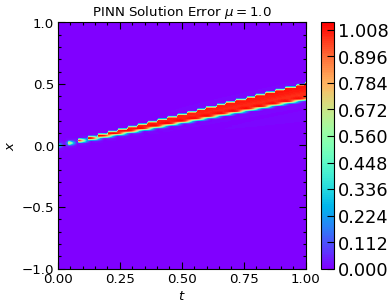

Epoch: 9200 | loss: 0.0003970627731177956,rMAE: 0.05778015777468681, rRMSE:0.2101864218711853,loss_RH:0.00000000,loss_con:0.98603261,loss_R:2.7164842322235927e-05,loss_IC:1.1502903362270445e-05,loss_BC:2.5486890081083402e-05
Epoch: 9400 | loss: 3.515427670208737e-05,rMAE: 0.04546106234192848, rRMSE:0.20063892006874084,loss_RH:0.00000000,loss_con:1.00013113,loss_R:1.7493966879555956e-05,loss_IC:1.6840834859976894e-06,loss_BC:8.194778899905941e-08
Epoch: 9600 | loss: 3.3270844141952693e-05,rMAE: 0.04197525233030319, rRMSE:0.19177286326885223,loss_RH:0.00000000,loss_con:0.99995816,loss_R:1.6748226698837243e-05,loss_IC:1.5683440324210096e-06,loss_BC:8.391775452309957e-08
Epoch: 9800 | loss: 3.14149001496844e-05,rMAE: 0.038450662046670914, rRMSE:0.18259483575820923,loss_RH:0.00000000,loss_con:1.00011349,loss_R:1.607503872946836e-05,loss_IC:1.4590285672966274e-06,loss_BC:7.495764720033549e-08
Epoch: 10000 | loss: 2.9671449738088995e-05,rMAE: 0.034812089055776596, rRMSE:0.17249509692192078,lo

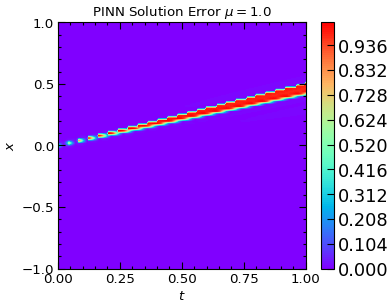

Epoch: 10200 | loss: 5.011290340917185e-05,rMAE: 0.03156903758645058, rRMSE:0.1623774915933609,loss_RH:0.00000000,loss_con:1.00353765,loss_R:1.552293360873591e-05,loss_IC:1.7452712199883536e-06,loss_BC:1.713725623631035e-06
Epoch: 10400 | loss: 2.674825918802526e-05,rMAE: 0.027963265776634216, rRMSE:0.15172898769378662,loss_RH:0.00000000,loss_con:1.00014043,loss_R:1.4182439372234512e-05,loss_IC:1.1839933904411737e-06,loss_BC:7.258856982161888e-08
Epoch: 10600 | loss: 2.5384350010426715e-05,rMAE: 0.02524275705218315, rRMSE:0.14265286922454834,loss_RH:0.00000000,loss_con:1.00000525,loss_R:1.357381643174449e-05,loss_IC:1.1074492931584246e-06,loss_BC:7.360414144841343e-08
Epoch: 10800 | loss: 0.0003283657133579254,rMAE: 0.027443140745162964, rRMSE:0.13144618272781372,loss_RH:0.00000000,loss_con:1.01310182,loss_R:2.1064517568447627e-05,loss_IC:8.366955626115669e-06,loss_BC:2.2363165044225752e-05
Epoch: 11000 | loss: 2.2836671632830985e-05,rMAE: 0.019102901220321655, rRMSE:0.1195445358753204

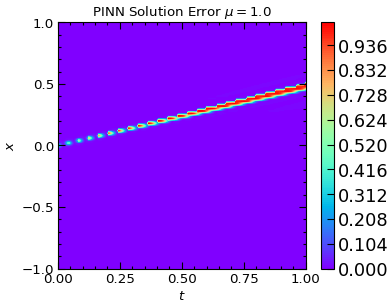

Epoch: 11200 | loss: 2.184603363275528e-05,rMAE: 0.01656980812549591, rRMSE:0.10854677855968475,loss_RH:0.00000000,loss_con:1.00006580,loss_R:1.2123242413508706e-05,loss_IC:9.015390673994261e-07,loss_BC:7.074008578911162e-08
Epoch: 11400 | loss: 4.525936674326658e-05,rMAE: 0.014268278144299984, rRMSE:0.09502657502889633,loss_RH:0.00000000,loss_con:0.99648678,loss_R:1.2183001672383398e-05,loss_IC:1.626699940970866e-06,loss_BC:1.6809367480163928e-06
Epoch: 11600 | loss: 1.9664228602778167e-05,rMAE: 0.011371823027729988, rRMSE:0.08157932758331299,loss_RH:0.00000000,loss_con:1.00011683,loss_R:1.113514827011386e-05,loss_IC:7.876703307374555e-07,loss_BC:6.52378275844967e-08
Epoch: 11800 | loss: 0.0012354417704045773,rMAE: 0.011782181449234486, rRMSE:0.07079543173313141,loss_RH:0.00000000,loss_con:1.02593040,loss_R:4.436971357790753e-05,loss_IC:3.196842590114102e-05,loss_BC:8.713877468835562e-05
Epoch: 12000 | loss: 1.7839485735748895e-05,rMAE: 0.007956395857036114, rRMSE:0.0576227642595768,l

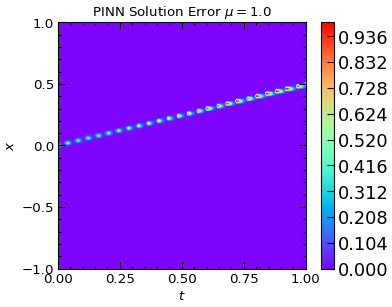

Epoch: 12200 | loss: 0.0005841677775606513,rMAE: 0.007928305305540562, rRMSE:0.04169623926281929,loss_RH:0.00000000,loss_con:0.98287630,loss_R:2.6986263037542813e-05,loss_IC:1.6546000551898032e-05,loss_BC:3.9172155084088445e-05
Epoch: 12400 | loss: 1.6124908142955974e-05,rMAE: 0.0058868033811450005, rRMSE:0.03725266084074974,loss_RH:0.00000000,loss_con:1.00010705,loss_R:9.537652658764273e-06,loss_IC:6.032844339642907e-07,loss_BC:5.5441113033793954e-08
Epoch: 12600 | loss: 0.0005891565233469009,rMAE: 0.013364095240831375, rRMSE:0.03801243007183075,loss_RH:0.00000000,loss_con:1.01775515,loss_R:2.5821520466706716e-05,loss_IC:1.5342064216383733e-05,loss_BC:4.0991439163917676e-05
Epoch: 12800 | loss: 1.4815212125540711e-05,rMAE: 0.00547691248357296, rRMSE:0.033058833330869675,loss_RH:0.00000000,loss_con:1.00008559,loss_R:8.91534818947548e-06,loss_IC:5.227914243732812e-07,loss_BC:6.719494649587432e-08
Epoch: 13000 | loss: 1.3952994777355343e-05,rMAE: 0.005413303151726723, rRMSE:0.03303175792

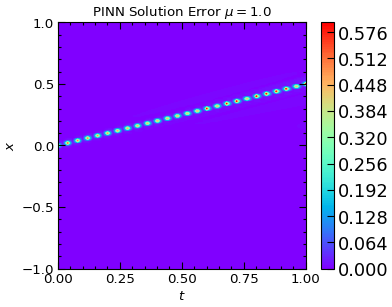

Epoch: 13200 | loss: 1.3258981198305264e-05,rMAE: 0.005357229616492987, rRMSE:0.03300698101520538,loss_RH:0.00000000,loss_con:1.00010443,loss_R:8.20711375126848e-06,loss_IC:4.620606830485485e-07,loss_BC:4.312611778800601e-08
Epoch: 13400 | loss: 1.2730632988677826e-05,rMAE: 0.0052918181754648685, rRMSE:0.032968394458293915,loss_RH:0.00000000,loss_con:1.00011110,loss_R:7.949714927235618e-06,loss_IC:4.276189429219812e-07,loss_BC:5.047286322223954e-08
Epoch: 13600 | loss: 1.3564318578573875e-05,rMAE: 0.005266347900032997, rRMSE:0.032954469323158264,loss_RH:0.00000000,loss_con:0.99920505,loss_R:7.670012564631179e-06,loss_IC:4.6509927642546245e-07,loss_BC:1.2433132212663622e-07
Epoch: 13800 | loss: 1.1594928764679935e-05,rMAE: 0.005168492905795574, rRMSE:0.03292139992117882,loss_RH:0.00000000,loss_con:1.00008321,loss_R:7.425705462082988e-06,loss_IC:3.7059601254441077e-07,loss_BC:4.632632055745489e-08
Epoch: 14000 | loss: 3.5467710404191166e-05,rMAE: 0.009358570910990238, rRMSE:0.03307582437

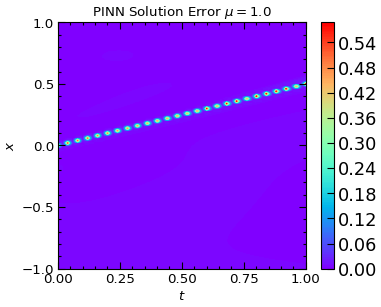

Epoch: 14200 | loss: 1.052594234352e-05,rMAE: 0.0050545246340334415, rRMSE:0.032884497195482254,loss_RH:0.00000000,loss_con:1.00008488,loss_R:6.942012532817898e-06,loss_IC:3.194565181274811e-07,loss_BC:3.8936455837301764e-08
Epoch: 14400 | loss: 1.0149549780180678e-05,rMAE: 0.004994749557226896, rRMSE:0.03285130858421326,loss_RH:0.00000000,loss_con:1.00012255,loss_R:6.73820750307641e-06,loss_IC:2.9461187978085945e-07,loss_BC:4.6522295349404885e-08
Epoch: 14600 | loss: 9.581799531588331e-06,rMAE: 0.004942447412759066, rRMSE:0.03282546624541283,loss_RH:0.00000000,loss_con:1.00008178,loss_R:6.509060312964721e-06,loss_IC:2.734643942403636e-07,loss_BC:3.3809463673151186e-08
Epoch: 14800 | loss: 9.423329174751416e-06,rMAE: 0.004878853913396597, rRMSE:0.03280309587717056,loss_RH:0.00000000,loss_con:1.00005388,loss_R:6.351349838951137e-06,loss_IC:2.540544414841861e-07,loss_BC:5.314348783258538e-08
Epoch: 15000 | loss: 8.813402018859051e-06,rMAE: 0.00482661509886384, rRMSE:0.03280795365571976,l

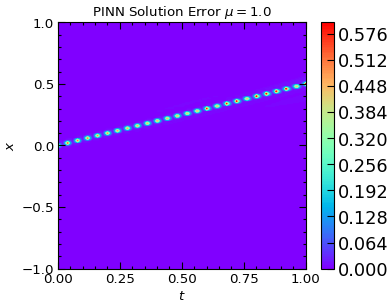

Epoch: 15200 | loss: 1.0285208190907724e-05,rMAE: 0.004881593398749828, rRMSE:0.032802313566207886,loss_RH:0.00000000,loss_con:1.00108719,loss_R:6.041209417162463e-06,loss_IC:2.442179152239987e-07,loss_BC:1.8018198488789494e-07
Epoch: 15400 | loss: 8.1067319115391e-06,rMAE: 0.004728395491838455, rRMSE:0.03278864547610283,loss_RH:0.00000000,loss_con:1.00006557,loss_R:5.752858669438865e-06,loss_IC:1.9988050325991935e-07,loss_BC:3.550681881847595e-08
Epoch: 15600 | loss: 0.00020905403653159738,rMAE: 0.008270141668617725, rRMSE:0.032978300005197525,loss_RH:0.00000000,loss_con:1.01045442,loss_R:1.1998334230156615e-05,loss_IC:5.3866542657488026e-06,loss_BC:1.4318915418698452e-05
Epoch: 15800 | loss: 7.394864496745868e-06,rMAE: 0.004636556375771761, rRMSE:0.032741304486989975,loss_RH:0.00000000,loss_con:1.00005722,loss_R:5.405324372986797e-06,loss_IC:1.6975604921753984e-07,loss_BC:2.919796671108088e-08
Epoch: 16000 | loss: 7.222723070299253e-06,rMAE: 0.0045942505821585655, rRMSE:0.03273605182

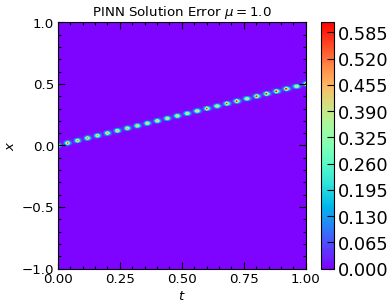

Epoch: 16200 | loss: 0.0005348929553292692,rMAE: 0.010526187717914581, rRMSE:0.03303821012377739,loss_RH:0.00000000,loss_con:0.98351145,loss_R:2.0596715330611914e-05,loss_IC:1.4695078789372928e-05,loss_BC:3.6734549212269485e-05
Epoch: 16400 | loss: 6.526084689539857e-06,rMAE: 0.004500158596783876, rRMSE:0.032692793756723404,loss_RH:0.00000000,loss_con:1.00005651,loss_R:4.932934643875342e-06,loss_IC:1.3403891330199258e-07,loss_BC:2.5276108317484614e-08
Epoch: 16600 | loss: 6.885067705297843e-06,rMAE: 0.00447017652913928, rRMSE:0.03269626945257187,loss_RH:0.00000000,loss_con:1.00045276,loss_R:4.83631220049574e-06,loss_IC:1.3605556148377218e-07,loss_BC:6.881999325969446e-08
Epoch: 16800 | loss: 6.103949999669567e-06,rMAE: 0.004408042877912521, rRMSE:0.03266550600528717,loss_RH:0.00000000,loss_con:1.00004959,loss_R:4.657185399992159e-06,loss_IC:1.1890006135217845e-07,loss_BC:2.5776380141451227e-08
Epoch: 17000 | loss: 6.023424703016644e-06,rMAE: 0.004382685292512178, rRMSE:0.03265858814120

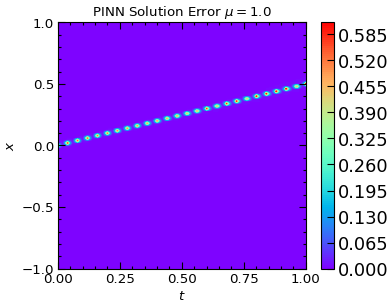

Epoch: 17200 | loss: 5.753006917075254e-06,rMAE: 0.004334126133471727, rRMSE:0.032681237906217575,loss_RH:0.00000000,loss_con:1.00004244,loss_R:4.406966581882443e-06,loss_IC:1.0777490189184391e-07,loss_BC:2.6829120258753392e-08
Epoch: 17400 | loss: 5.477589184010867e-06,rMAE: 0.0043042320758104324, rRMSE:0.032623618841171265,loss_RH:0.00000000,loss_con:1.00004172,loss_R:4.302445177017944e-06,loss_IC:9.828389835320195e-08,loss_BC:1.9230522951829698e-08
Epoch: 17600 | loss: 5.397876520873979e-06,rMAE: 0.004262880887836218, rRMSE:0.032638389617204666,loss_RH:0.00000000,loss_con:1.00003099,loss_R:4.186571459285915e-06,loss_IC:9.738834449990463e-08,loss_BC:2.374215313238892e-08
Epoch: 17800 | loss: 0.003699760651215911,rMAE: 0.02113420143723488, rRMSE:0.035818133503198624,loss_RH:0.00000000,loss_con:0.95622736,loss_R:0.00010972983727697283,loss_IC:0.00010038461186923087,loss_BC:0.00025861847097985446
Epoch: 18000 | loss: 5.10720155944e-06,rMAE: 0.004189775791019201, rRMSE:0.0325968638062477

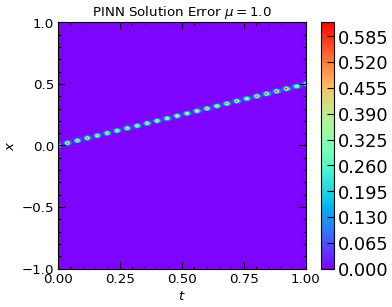

Epoch: 18200 | loss: 1.3329196008271538e-05,rMAE: 0.006987535860389471, rRMSE:0.03252037614583969,loss_RH:0.00000000,loss_con:0.99808246,loss_R:4.296648057788843e-06,loss_IC:3.2223346124737873e-07,loss_BC:5.810213110635232e-07
Epoch: 18400 | loss: 4.8354227146774065e-06,rMAE: 0.00412678113207221, rRMSE:0.032608844339847565,loss_RH:0.00000000,loss_con:1.00003409,loss_R:3.817714514298132e-06,loss_IC:8.25508124080443e-08,loss_BC:1.922000691934045e-08
Epoch: 18600 | loss: 5.084687472844962e-06,rMAE: 0.00411975709721446, rRMSE:0.03258431330323219,loss_RH:0.00000000,loss_con:0.99963826,loss_R:3.727821876964299e-06,loss_IC:9.4206953349385e-08,loss_BC:4.147960908085224e-08
Epoch: 18800 | loss: 0.0016608342994004488,rMAE: 0.00908773485571146, rRMSE:0.03288908302783966,loss_RH:0.00000000,loss_con:0.97087973,loss_R:5.2368985052453354e-05,loss_IC:4.48667342425324e-05,loss_BC:0.00011597981210798025
Epoch: 19000 | loss: 4.519988578977063e-06,rMAE: 0.004030053038150072, rRMSE:0.032534290105104446,los

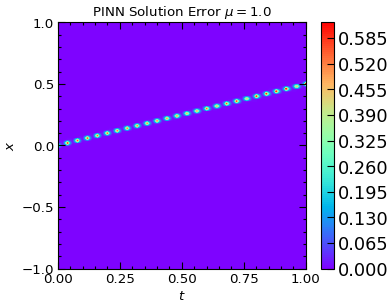

Epoch: 19200 | loss: 4.520299171417719e-06,rMAE: 0.004014411009848118, rRMSE:0.03248600661754608,loss_RH:0.00000000,loss_con:1.00001860,loss_R:3.512910325298435e-06,loss_IC:7.796686674055309e-08,loss_BC:2.277201360811887e-08
Epoch: 19400 | loss: 4.3177992665732745e-06,rMAE: 0.003972464241087437, rRMSE:0.03252899646759033,loss_RH:0.00000000,loss_con:1.00002217,loss_R:3.4521788165875478e-06,loss_IC:7.009499825016974e-08,loss_BC:1.6467048169488407e-08
Epoch: 19600 | loss: 4.533076207735576e-06,rMAE: 0.003969539888203144, rRMSE:0.03246312960982323,loss_RH:0.00000000,loss_con:1.00013161,loss_R:3.395408839423908e-06,loss_IC:8.197132927989514e-08,loss_BC:3.179540186692975e-08
Epoch: 19800 | loss: 4.2608794501575176e-06,rMAE: 0.003917668014764786, rRMSE:0.03249942511320114,loss_RH:0.00000000,loss_con:1.00001907,loss_R:3.3373103178746533e-06,loss_IC:7.263888335273805e-08,loss_BC:1.9718029875548382e-08
Epoch: 20000 | loss: 4.121262918488355e-06,rMAE: 0.0038970005698502064, rRMSE:0.03250418975949

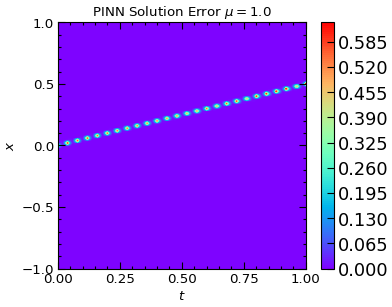

Epoch: 20200 | loss: 4.078128313267371e-06,rMAE: 0.0038860358763486147, rRMSE:0.032449860125780106,loss_RH:0.00000000,loss_con:1.00001311,loss_R:3.2816183193062898e-06,loss_IC:6.362341764543089e-08,loss_BC:1.602756327656607e-08
Epoch: 20400 | loss: 4.051407358929282e-06,rMAE: 0.003882005577906966, rRMSE:0.032459087669849396,loss_RH:0.00000000,loss_con:1.00001431,loss_R:3.2709804145270027e-06,loss_IC:6.247169892503734e-08,loss_BC:1.5571012923487615e-08
Epoch: 20600 | loss: 4.0180934774980415e-06,rMAE: 0.0038768863305449486, rRMSE:0.03246677666902542,loss_RH:0.00000000,loss_con:1.00001383,loss_R:3.2572065720160026e-06,loss_IC:6.099772775769452e-08,loss_BC:1.509094893492602e-08
Epoch: 20800 | loss: 3.979477241955465e-06,rMAE: 0.00387029186822474, rRMSE:0.032472193241119385,loss_RH:0.00000000,loss_con:1.00001335,loss_R:3.240469368392951e-06,loss_IC:5.9292055709647684e-08,loss_BC:1.4608717791020354e-08
Epoch: 21000 | loss: 3.936736902687699e-06,rMAE: 0.0038623963482677937, rRMSE:0.032474249

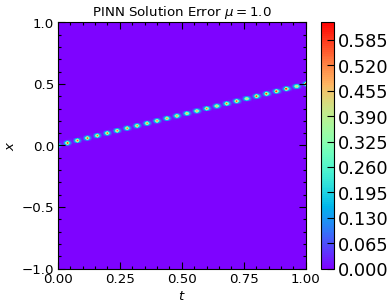

Epoch: 21200 | loss: 3.890432708431035e-06,rMAE: 0.003852966707199812, rRMSE:0.03247292339801788,loss_RH:0.00000000,loss_con:1.00001001,loss_R:3.1986589874577476e-06,loss_IC:5.5457725522956025e-08,loss_BC:1.3719638758402652e-08
Epoch: 21400 | loss: 3.841174020635663e-06,rMAE: 0.0038421067874878645, rRMSE:0.032468024641275406,loss_RH:0.00000000,loss_con:1.00000739,loss_R:3.1738134111947147e-06,loss_IC:5.343919795564034e-08,loss_BC:1.3296870271517491e-08
Epoch: 21600 | loss: 3.7887239159317687e-06,rMAE: 0.003829773049801588, rRMSE:0.03245959430932999,loss_RH:0.00000000,loss_con:1.00000501,loss_R:3.1462968763662502e-06,loss_IC:5.137826875056817e-08,loss_BC:1.2864425968928117e-08
Epoch: 21800 | loss: 3.7365439311543014e-06,rMAE: 0.0038166684098541737, rRMSE:0.03244711831212044,loss_RH:0.00000000,loss_con:1.00000048,loss_R:3.1172171475191135e-06,loss_IC:4.946290843577117e-08,loss_BC:1.2469767440848045e-08
Epoch: 22000 | loss: 3.685341198433889e-06,rMAE: 0.0038032568991184235, rRMSE:0.032432

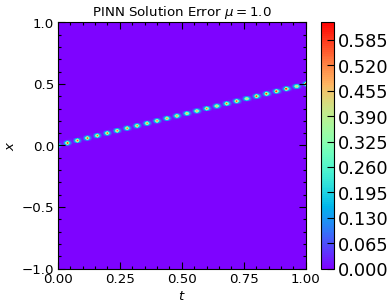

Epoch: 22200 | loss: 3.6379888115334325e-06,rMAE: 0.003789721755310893, rRMSE:0.032415326684713364,loss_RH:0.00000000,loss_con:0.99995422,loss_R:3.0557325771951582e-06,loss_IC:4.6126299224624745e-08,loss_BC:1.2099320656488999e-08
Epoch: 22400 | loss: 3.643052878032904e-06,rMAE: 0.0037822481244802475, rRMSE:0.03239799663424492,loss_RH:0.00000000,loss_con:1.00017691,loss_R:3.027276989087113e-06,loss_IC:4.641482576062117e-08,loss_BC:1.516276704194297e-08
Epoch: 22600 | loss: 3.5327354908076813e-06,rMAE: 0.003761700354516506, rRMSE:0.0323827788233757,loss_RH:0.00000000,loss_con:0.99997926,loss_R:2.991317842315766e-06,loss_IC:4.303193890109469e-08,loss_BC:1.1109819730847903e-08
Epoch: 22800 | loss: 3.4821141525753774e-06,rMAE: 0.0037470790557563305, rRMSE:0.03236561641097069,loss_RH:0.00000000,loss_con:0.99999750,loss_R:2.9582774914160836e-06,loss_IC:4.1694537600278636e-08,loss_BC:1.0689122476037483e-08
Epoch: 23000 | loss: 3.432392986724153e-06,rMAE: 0.003732894081622362, rRMSE:0.032348897

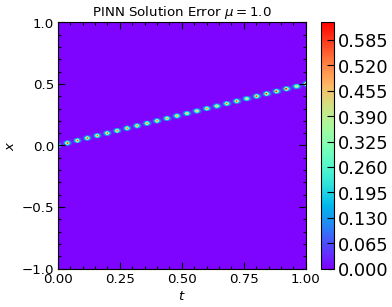

Epoch: 23200 | loss: 3.462476797722047e-06,rMAE: 0.0037178227212280035, rRMSE:0.03233328461647034,loss_RH:0.00000000,loss_con:1.00020027,loss_R:2.8937622573721455e-06,loss_IC:4.181963930705024e-08,loss_BC:1.505181401739719e-08
Epoch: 23400 | loss: 1.7316482626483776e-05,rMAE: 0.004325230605900288, rRMSE:0.032334357500076294,loss_RH:0.00000000,loss_con:1.00270593,loss_R:3.2818813906487776e-06,loss_IC:4.231121408793115e-07,loss_BC:9.803479770198464e-07
Epoch: 23600 | loss: 3.2832519991643494e-06,rMAE: 0.003689592005684972, rRMSE:0.032311372458934784,loss_RH:0.00000000,loss_con:0.99999559,loss_R:2.820617282850435e-06,loss_IC:3.6773872835738075e-08,loss_BC:9.489600216738836e-09
Epoch: 23800 | loss: 3.2337593438569456e-06,rMAE: 0.003675137646496296, rRMSE:0.032302677631378174,loss_RH:0.00000000,loss_con:1.00000095,loss_R:2.7851099275721936e-06,loss_IC:3.5658686670103634e-08,loss_BC:9.20626064271346e-09
Epoch: 24000 | loss: 3.1844951990933623e-06,rMAE: 0.003660692134872079, rRMSE:0.032297100

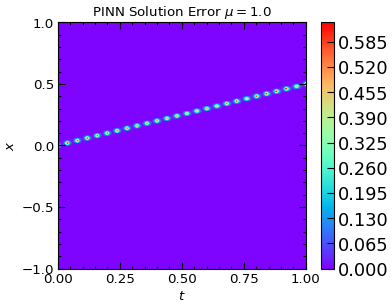

Epoch: 24200 | loss: 3.1372103421745123e-06,rMAE: 0.003646256634965539, rRMSE:0.03229407221078873,loss_RH:0.00000000,loss_con:1.00002384,loss_R:2.71350495495426e-06,loss_IC:3.364335299238519e-08,loss_BC:8.727191413981927e-09
Epoch: 24400 | loss: 3.1307035897043534e-06,rMAE: 0.0036346670240163803, rRMSE:0.032293807715177536,loss_RH:0.00000000,loss_con:1.00014472,loss_R:2.6787527076521656e-06,loss_IC:3.417005700612208e-08,loss_BC:1.1025026225297552e-08
Epoch: 24600 | loss: 3.0377648272406077e-06,rMAE: 0.0036186387296766043, rRMSE:0.0322997011244297,loss_RH:0.00000000,loss_con:0.99999595,loss_R:2.641135779413162e-06,loss_IC:3.1459958194091087e-08,loss_BC:8.202949430824447e-09
Epoch: 24800 | loss: 2.9901134439569432e-06,rMAE: 0.003604953410103917, rRMSE:0.03230591490864754,loss_RH:0.00000000,loss_con:0.99999046,loss_R:2.6048819563584402e-06,loss_IC:3.0527576910799326e-08,loss_BC:7.995577533392861e-09
Epoch: 25000 | loss: 2.943015260825632e-06,rMAE: 0.003591611050069332, rRMSE:0.03231496363

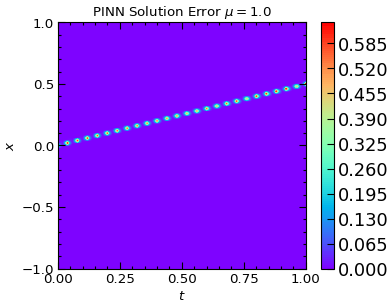

PINN Training Completed

PINN Training Time: 0.10461332131849808 Hours


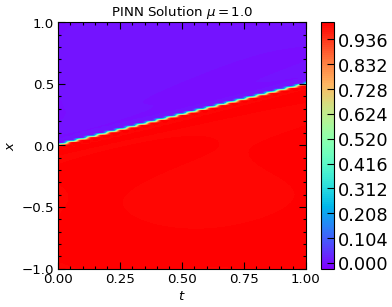

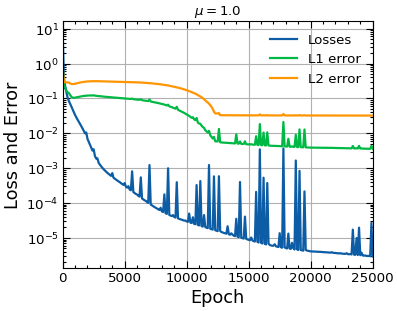

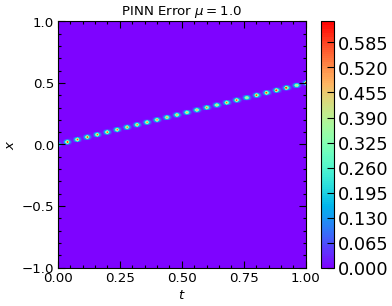

PINN at 1.0 with the rMAE = 0.003591611050069332 and rRMSE = 0.0323149636387825


In [5]:
total_train_time_1 = time.perf_counter()
for i in range(0, number_of_parameters):
    print("******************************************************************")
    ########################### Full PINN Training ###########################
    IC_data = create_IC_data(nu_pinn_train,Xi, Xf, Ti, Tf, IC_pts, IC_simple)
    IC_xt     = IC_data[0].to(device)
    IC_u      = IC_data[1].to(device)
    #plt.scatter(IC_xt[:,1].detach().cpu(),IC_xt[:,0].detach().cpu(),s=0.1)

    Exact_y = exact_u(nu_pinn_train,xt_test)[:,None]
    #Burgers_plot(xt_test, Exact_y, Nx_test,Nt_test, title=fr"Exact Solution $\mu={round(nu_pinn_train,3)}$")

    pinn_train_time_1 = time.perf_counter()
    PINN = NN(nu_pinn_train, layers_pinn,dt).to(device)
        
    pinn_losses = pinn_train(PINN, nu_pinn_train, xt_resid, IC_xt, IC_u, BC1, BC2,xt_RHL, xt_RHR,xt_RHt,xt_RHtL, f_hat, Exact_y, epochs_pinn, lr_pinn, tol_pinn, xt_test)

    pinn_train_time_2 = time.perf_counter()
    print(f"PINN Training Time: {(pinn_train_time_2-pinn_train_time_1)/3600} Hours")

    Burgers_plot(xt_test, PINN(xt_test),Nx_test,Nt_test, title=fr"PINN Solution $\mu={nu_pinn_train}$")
        
    plt.figure(dpi=80, figsize=(5,4))    
    plt.plot(pinn_losses[0], pinn_losses[1], linewidth=2, label="Losses")
    plt.plot(pinn_losses[0], pinn_losses[2], linewidth=2, label="L1 error")
    plt.plot(pinn_losses[0], pinn_losses[3], linewidth=2, label="L2 error")
    
    plt.xlabel("Epoch",     fontsize=16)
    plt.ylabel("Loss and Error", fontsize=16)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='minor', labelsize=12)
     
    plt.grid(True)
    plt.xlim(0,max(pinn_losses[0]))
    plt.yscale('log')
    plt.title(fr"$\mu={round(nu_pinn_train,3)}$",fontsize=12)
    plt.legend(fontsize = 12)#
    plt.show()

    # Compute Full PINN Error
    rMAE = max(sum(abs(PINN(xt_test)-Exact_y))/sum(abs(Exact_y)))
    rRMSE = torch.sqrt(sum((PINN(xt_test)-Exact_y)**2)/sum((Exact_y)**2)).item()
    Burgers_plot(xt_test, abs(PINN(xt_test)-Exact_y), Nx_test,Nt_test,title=fr"PINN Error $\mu={nu_pinn_train}$")
    print(f"PINN at {nu_pinn_train} with the rMAE = {rMAE} and rRMSE = {rRMSE}")
total_train_time_2 = time.perf_counter()            

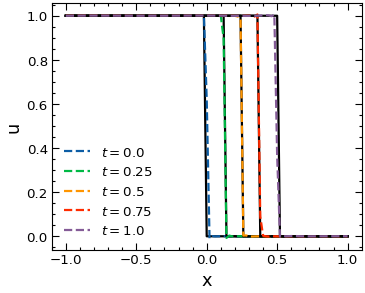

In [6]:
plt.figure(dpi=80, figsize=(5,4))#dpi=150, figsize=(10,8)

for ind in range(1, Nt_test+1,50):
    plt.plot(xt_test[0:Nx_test,0].detach().cpu(),Exact_y[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'k')
    #plt.scatter(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),s=20,label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
    plt.plot(xt_test[0:Nx_test,0].detach().cpu(),PINN(xt_test)[(ind-1)*Nx_test:ind*Nx_test,0].detach().cpu(),'--',label=fr"$t={round((ind-1)*(Tf-Ti)/(Nt_test-1),3)}$")
plt.xlabel("x",     fontsize=16)
plt.ylabel("u", fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)

plt.legend(fontsize = 12)#
plt.show()

In [8]:
w1 = PINN.linears[0].weight.detach().cpu()
w2 = PINN.linears[1].weight.detach().cpu()
w3 = PINN.linears[2].weight.detach().cpu()
w4 = PINN.linears[3].weight.detach().cpu()
w5 = PINN.linears[4].weight.detach().cpu()
#w6 = PINN.linears[5].weight.detach().cpu()

b1 = PINN.linears[0].bias.detach().cpu()
b2 = PINN.linears[1].bias.detach().cpu()
b3 = PINN.linears[2].bias.detach().cpu()
b4 = PINN.linears[3].bias.detach().cpu()
b5 = PINN.linears[4].bias.detach().cpu()
#b6 = PINN.linears[5].bias.detach().cpu()

# Add new activation functions
P_list[i] = P(layers_pinn, w1, w2, w3, w4, w5, b1, b2, b3, b4,b5).to(device)

import pickle 
with open('IFNN_shock1.pkl', 'wb') as f:
        pickle.dump(P_list, f)